In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
%matplotlib inline

In [4]:
covariance = np.array([[0.14, -0.3, 0.0, 0.2],
                       [-0.3, 1.16, 0.2, -0.8],
                       [0.0, 0.2, 1.0, 1.0],
                       [0.2, -0.8, 1.0, 2.0]])
precision = np.linalg.inv(covariance)
print(precision)

[[ 60.   50.  -48.   38. ]
 [ 50.   50.  -50.   40. ]
 [-48.  -50.   52.4 -41.4]
 [ 38.   40.  -41.4  33.4]]


In [26]:
def generate_pair():
    return np.random.multivariate_normal([0.8, 0.8], [[0.1, -0.1],[-0.1, 0.12]])

In [27]:
mu_t = generate_pair()
print(mu_t)

[ 0.27611644  1.17809259]


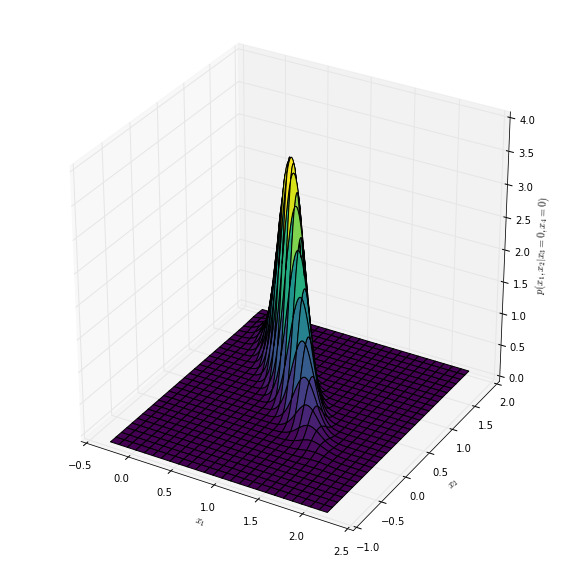

In [43]:
x, y = np.mgrid[-0.25:2.25:.01, -1:2:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y
mu_p = [0.8, 0.8]
cov_p = [[0.1, -0.1], [-0.1, 0.12]]
z = multivariate_normal(mu_p, cov_p).pdf(pos)

fig = plt.figure(figsize=(10, 10), dpi=300)
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, z, cmap=plt.cm.viridis)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
ax.set_zlabel('$p(x_1, x_2 | x_3=0, x_4=0)$')
plt.savefig('plots/cond_mvg.png', bbox_inches='tight', dpi=300)
plt.show()

In [37]:
N = 1000

In [3]:
# data = np.random.multivariate_normal([0.28, 1.18], [[2.0, 0.8], [0.8, 4.0]], N)

In [4]:
np.savetxt('data.txt', data)

In [45]:
mu_ml = data.mean(axis=0)
x = data - mu_ml
cov_ml = np.dot(x.T, x) / N
cov_ml_unbiased = np.dot(x.T, x) / (N - 1)
print(mu_ml)
print(cov_ml)
print(cov_ml_unbiased)

[ 0.25260341  1.21164341]
[[ 2.02283861  0.82815475]
 [ 0.82815475  3.62573469]]
[[ 2.02486347  0.82898374]
 [ 0.82898374  3.62936406]]


In [48]:
mu_ml = 0
cov_ml = 0
for i in range(N):
    mu_ml += (data[i]-mu_ml) / (i + 1)
print(mu_ml)

[ 0.25260341  1.21164341]
